# Import LagrangianTraj_MF package

In [21]:
%run LagrangianTraj_MF.ipynb

# Model data

#### ERA5

In [14]:
# Root where all model files are stored
root_exp="/home/wimmerm/LagrangianTraj/Pour_Vinita/"

# Name of longitude, latitude, pressure dimensions
list_coord=['longitude','latitude','level']    

# Initial time of forecast
Initial_time_model='2016-10-01T00:00:00.000000000'
# End of forecast
End_time_model='2016-10-02T12:00:00.000000000'
# Format of time : %Y:year, %m:month,%d:day, %H:hour, %M:minute, %S:second
time_format='%Y-%m-%dT%H:%M:%S.000000000'
# Time between two model output (in hour)
dt_modelOutput = 6
# List of model time (no need to be modified)
YYMMDDHH_model=TimeList(Initial_time_model, 1 , dt_modelOutput, time_format, time_end=End_time_model,format_output=time_format)

# File name
file_name="era5_1-2oct.nc"
# File type
file_type='netcdf'
# Open file
file_data,LON_model, LAT_model, PRE_model=read_model(root_exp,file_name, 'netcdf',list_coord)

#### ICON

In [ ]:
# Root where all model files are stored
root_exp="/home/wimmerm/HErZ/Data/ICON_LAM_AD-HOC_CI-ICON_2TE_GUF_RF12/"

# Name of longitude, latitude, pressure dimensions
list_coord=['lon','lat','plev'] 

# Initial time of forecast
Initial_time_model='20180217T180000Z'
# End of forecast
End_time_model='20180218T040000Z'
#Format of time : %Y:year, %m:month,%d:day, %H:hour, %M:minute, %S:second
time_format='%Y%m%dT%H%M%SZ'
# Time between two model output (in hour)
dt_modelOutput =1
# List of model time (no need to be modified)
YYMMDDHH_model=TimeList(Initial_time_model, 1 , dt_modelOutput, time_format, time_end=End_time_model,format_output=time_format)

# File names
file_names=[root_exp + "ICON_LAM_AD-HOC_CI-ICON_2TE_GUF_RF12_var_pl_"+i+"_DOM01_regular.nc" for i in YYMMDDHH_model]
# File type
file_type='netcdf'
# Open file
file_data,LON_model, LAT_model, PRE_model=read_model(root_exp,file_names, 'netcdf',list_coord)

#### ARPEGE

In [ ]:
# Root where all model files are stored
root_exp="/home/wimmerm/NAWDEX/Data/fc_000/"

# Name of longitude, latitude, pressure dimensions
list_coord=['longitude','latitude','isobaricInhPa']    

#Initial time of forecast
Initial_time_model='2016-10-01T12:00:00.000000000'
# End of forecast
End_time_model='2016-10-02T12:00:00.000000000'
#Format of time : %Y:year, %m:month,%d:day, %H:hour, %M:minute, %S:second
time_format='%Y-%m-%dT%H:%M:%S.000000000'
# Time between two model output (in hour)
dt_modelOutput =0.25 
# List of time
YYMMDDHH_model=TimeList(Initial_time_model, 1 , dt_modelOutput, time_format, time_end=End_time_model,         format_output=time_format)

# File names
file_names=[root_exp + "GRIDHSTGLOB05+" +str(i).zfill(4) for i in range(0,195,2)]
# File type
file_type='grib'
# Open file

file_data,LON_model, LAT_model, PRE_model=read_model(root_exp,file_names, 'grib',list_coord,
                                                    longitude_slice=(-50,10), latitude_slice=(30,80),
                                                    grib_selection={'typeOfLevel': 'isobaricInhPa'})

# -------------------------------------------------------------------------
# Maybe delete if w is in the same number of levels as other variables
# -------------------------------------------------------------------------
# For all variables, delete vertical levels that doesn't exist in w
file_data11=file_data.isel(pressure=slice(0,2,1))
file_data12=file_data.isel(pressure=slice(3,21,1))
file_data1= xr.concat([file_data11,file_data12], dim='pressure')
file_data2,LON_model, LAT_model, PRE_model=read_model(root_exp,file_names, 'grib',list_coord,
                                                    longitude_slice=(-50,10), latitude_slice=(30,80),
                                                    grib_selection={'shortName': 'w'})
# Merge all var
file_data= xr.merge([file_data1, file_data2])


# Trajectories definition

In [23]:
# Time resolution of Lagrangian trajectories (in hour)
dt_traj=1 # for ERA5
#dt_traj=0.5 # for ICON
#dt_traj=0.125 # for ARPEGE


# type of Trajectories
BACKWARD=True
# Duration of trajectories (in hours)
Trajectories_duration=12

#Initial and end time of trajetories
Initial_time_traj='2016-10-02T12:00:00.000000000'
End_time_traj='2016-10-01T12:00:00.000000000'

#Initial_time_traj='20180218T040000Z'
#End_time_traj='20180217T180000Z'

# Seeding Points

#### Give limits of seedings and resolution

In [ ]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=125,   lon_End=150,   lon_Resolution=0.1, 
                                  lat_Init=-68,   lat_End=-51,   lat_Resolution=0.1,
                                  pre_Init=50000, pre_End=95000, pre_Resolution=5000,
                                  CV=False)

#### Give limits of seedings and number of seeding points

In [ ]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=125,   lon_End=150,   lon_Number=251, 
                                  lat_Init=-68,   lat_End=-51,   lat_Number=171,
                                  pre_Init=50000, pre_End=95000, pre_Number=10,
                                  CV=False)

#### Give initial seeding points and resolution and number of seeding points

In [ ]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=125,   lon_Resolution=0.1,  lon_Number=251, 
                                  lat_Init=-68,   lat_Resolution=0.1,  lat_Number=171,
                                  pre_Init=50000, pre_Resolution=5000, pre_Number=10,
                                  CV=False)

#### For NAWDEX

In [16]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=-27,   lon_End=-17,   lon_Resolution=0.1, 
                                  lat_Init=58,    lat_End=58,    lat_Number=1,
                                  pre_Init=50000, pre_End=95000, pre_Resolution=5000,
                                  CV=False)

Seeding along a cross-section
1010 trajectories seeds generated


#### Map of Seeding

In [ ]:
i_lev=GetPressureLevel(PRE_model,levelInPa=85000)

i_time=GetTimeStep(YYMMDDHH_model,time_wanted=Initial_time_traj)  # time_wanted must be in the same time format that YYMMDDHH_model

# Create Figure
fig, ax=TrajMap(100,160,-70,-30)
#fig, ax=TrajMap(-60,0,30, 70) # NAWDEX

i_var='rh'
colorbar_label='Relative Humidity @'+str(int(PRE_model[i_lev]/100))+'hPa'
cmap='RdPu_r'
TrajMap_AddField(ax,colorbar_label, 
                 LON_model, LAT_model, 
                 file_data.variables[i_var].data[i_time,i_lev,:,:], 
                 cmap)

TrajMap_AddArrow(ax,LON_model, LAT_model, 
                 file_data.variables['u'][i_time,i_lev,:,:],
                 file_data.variables['v'][i_time,i_lev,:,:],
                 resol=20) # display every 20 grid points

#TrajMap_AddSeedingPoint(ax,LON_seed, LAT_seed, resol=50) # print only every 50 seeding points # to see all seedings points, put resol at 1
TrajMap_AddSeedingPoint(ax,LON_seed, LAT_seed, resol=1000) # print only every 1000 seeding points # to see all seedings points, put resol at 1


# Delete seeding points that do not fullfill a criterion

### Interpolation of variables at initial time of trajectories

In [24]:
# Variables names used for advection (change according to variables names in your files)
list_var_advec=['u','v','w']
# Names of interpolated variables ('rh, 't', ... )
list_var=[]

# ------------------------------------
# DO NOT CHANGE !
# ------------------------------------
# Dimensions names 
list_coord=['longitude','latitude','pressure']

# Time step of initial time of trajectories
i_time=GetTimeStep(YYMMDDHH_model,time_wanted=Initial_time_traj)
    
# Initalise of initial value of trajectories (u, v, w and other variables)
Traj_init={}
for i_var in list_coord+list_var_advec+list_var:
    Traj_init[i_var]=np.zeros((nb_traj))
    if i_var not in list_coord: 
        Traj_init[i_var]=np.nan

# Initial value for longitude, latitude, pressure of seedings
for i_var,var_seed in zip(list_coord,[LON_seed,LAT_seed,PRE_seed]):
    Traj_init[i_var]=var_seed
    
# Interpolation of variables at initial position of trajectories
for i_var in list_var_advec+list_var:
    Traj_init[i_var]=interpn((PRE_model,LAT_model,LON_model),
                             file_data.variables[i_var].data[i_time,:,:,:],
                             np.array([PRE_seed,LAT_seed,LON_seed]).T)


### Criterion

In [ ]:
crit=Traj_init['rh']<33 #%
crit2=Traj_init['pressure']>=85000 #hPa
crit3=Traj_init['pressure']<=90000
CRIT=crit*crit2*crit3

### Delete trajectories that does not satisfy the criterion

In [ ]:
for i_var in list_coord+list_var:
    Traj_init[i_var] = Traj_init[i_var][CRIT]

### Plots to verify the criterion does really select the wanted area

In [ ]:
cmap='RdPu_r'
i_var='rh'

for num_plev,i_plev in enumerate(PRE_model):
    colorbar_label='Relative Humidity @'+str(int(i_plev/100))+'hPa'
    
    fig, ax=TrajMap(100,160,-70,-30)
    TrajMap_AddField(ax,colorbar_label,
                     LON_model, LAT_model,
                     file_data.variables[i_var].data[i_time,num_plev,:,:],
                     cmap)
    
    crit_horiz=Traj_init['pressure']==i_plev
    if np.any(crit_horiz):
        TrajMap_AddSeedingPoint(ax,
                                Traj_init['longitude'][crit_horiz],
                                Traj_init['latitude'][crit_horiz],
                                resol=100) # print only every 1000 seeding points # to see all seedings points, put at 1

# Trajectories Computation

In [25]:
Traj=TrajCompute(
                Initial_time_traj,End_time_traj,dt_traj,time_format,
                dt_modelOutput,Trajectories_duration,nb_traj,LON_seed, LAT_seed, PRE_seed,
                list_coord, list_var_advec, list_var, file_data, YYMMDDHH_model

                )

[datetime.datetime(2016, 10, 2, 12, 0), datetime.datetime(2016, 10, 2, 11, 0), datetime.datetime(2016, 10, 2, 10, 0), datetime.datetime(2016, 10, 2, 9, 0), datetime.datetime(2016, 10, 2, 8, 0), datetime.datetime(2016, 10, 2, 7, 0), datetime.datetime(2016, 10, 2, 6, 0), datetime.datetime(2016, 10, 2, 5, 0), datetime.datetime(2016, 10, 2, 4, 0), datetime.datetime(2016, 10, 2, 3, 0), datetime.datetime(2016, 10, 2, 2, 0), datetime.datetime(2016, 10, 2, 1, 0), datetime.datetime(2016, 10, 2, 0, 0)]
Trajectories calculation: 
	 time step :  36
	 time step :  30


# Plot of Trajectories

/home/wimmerm/venv/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Trajectories plot: ok


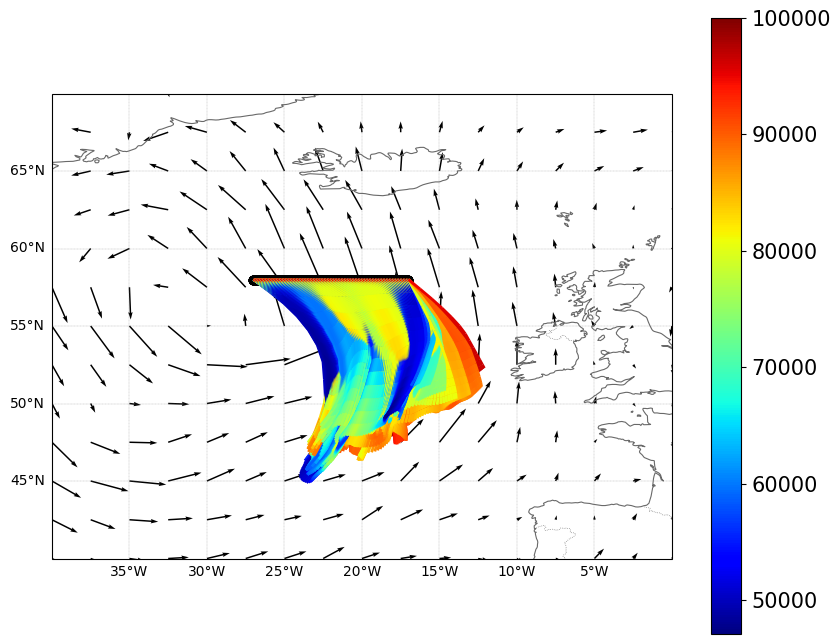

In [27]:
fig, ax=TrajMap(-40,0,40, 70)

i_lev=GetPressureLevel(PRE_model,levelInPa=85000)
TrajMap_AddArrow(ax,LON_model, LAT_model, 
                 file_data.u[i_time,i_lev,:,:],
                 file_data.v[i_time,i_lev,:,:],
                 resol=10)

TrajMap_AddSeedingPoint(ax, LON_seed, LAT_seed, resol=1) # print only every 1000 seeding points # to see all seedings points, put at 1

TrajMap_AddTrajectories(fig, ax,
                        Traj[list_coord[0]],
                        Traj[list_coord[1]],
                        Traj[list_coord[2]])
